In [128]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from folium.plugins import HeatMap
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [129]:
column_names = ['Address', 'PostalCode', 'District', 'HouseType', 'SoldPrice',
                'ListPrice', 'Tax', 'DOM', 'Lot', 'Rms', 'Bedrooms', 'Washrms',
                'ClientRemks', 'Extras', 'BrkageRemks', 'Kitchens', 'FamRm',
                'Basement', 'FireplaceStv', 'Heat', 'AC', 'CentralVac',
                'ApxAge', 'ApxSqft', 'Assessment', 'POTL', 'LaundryLev',
                'Exterior', 'Drive', 'GarGarSpcs', 'DrivePkSpcs',
                'TotPkSpcs', 'UFF', 'Pool', 'PropFeat', 'Zoning', 'CableTV',
                'Hydro', 'Gas', 'Phone', 'Water', 'WaterSupply', 'Sewer',
                'Waterfront', 'Retirement', 'FarmAgr', 'OthStruct', 'Unnamed',
                'SpecDesig']

In [130]:
def dollar_to_num(col):
    return col.str.replace('\W', '').astype(int)

In [131]:
df_og = pd.read_csv('data/houses.csv', index_col=0)

new_cols =  dict(zip(df_og.columns, column_names))

df = (df_og
      .rename(columns=new_cols)
      .assign(SoldPrice=lambda x: dollar_to_num(x['SoldPrice']),
              ListPrice=lambda x: dollar_to_num(x['ListPrice']),
              Tax=lambda x: dollar_to_num(x['Tax']),
              District=lambda x: x['District'].str.slice(8),
              Rms=lambda x: x['Rms'].apply(pd.eval),
              Bedrooms=lambda x: x['Bedrooms'].apply(pd.eval),
              Kitchens=lambda x: x['Kitchens'].apply(pd.eval),
              LotWidth=lambda x: x['Lot'].str.split().str[0].astype(float),
              LotDepth=lambda x: x['Lot'].str.split().str[2].astype(float)
             )
      .query('DOM <= 365')
      .drop(['Lot', 'GarGarSpcs', 'DrivePkSpcs'], axis=1)
      .dropna(axis=1)
     )
df.head(3)

Address PostalCode District     HouseType  SoldPrice  ListPrice  \
0  91 Allenby Ave     M9W1S7      W10  1 1/2 Storey     552500     568000   
1    50 Exmoor Dr     M8W1R5      W06      Bungalow     615000     629000   
2    1 Vicross Rd     M4B3K7      E03      Bungalow     615700     639995   

      Tax  DOM  Rms  Bedrooms    ...     Kitchens  FamRm   Basement  \
0  227773   42    5         3    ...            1      N   Finished   
1  210899   22    8         4    ...            2      N  Apartment   
2  237061   70    6         2    ...            1      N   Part Fin   

  FireplaceStv              Heat           AC    Drive TotPkSpcs  LotDepth  \
0            Y  Forced Air / Gas  Central Air  Private         3     114.0   
1            N  Forced Air / Gas  Window Unit  Private         4      80.0   
2            N  Forced Air / Gas  Window Unit   Mutual         3     100.0   

   LotWidth  
0      44.0  
1      50.0  
2      40.0  

[3 rows x 21 columns]

In [132]:
df.isnull().sum().sort_values()

Address         0
TotPkSpcs       0
Drive           0
AC              0
Heat            0
FireplaceStv    0
Basement        0
FamRm           0
Kitchens        0
LotDepth        0
Washrms         0
Rms             0
DOM             0
Tax             0
ListPrice       0
SoldPrice       0
HouseType       0
District        0
PostalCode      0
Bedrooms        0
LotWidth        0
dtype: int64

In [133]:
df['DOM'].describe()

count    831.000000
mean      21.069795
std       24.795208
min        0.000000
25%        6.000000
50%       11.000000
75%       26.000000
max      133.000000
Name: DOM, dtype: float64

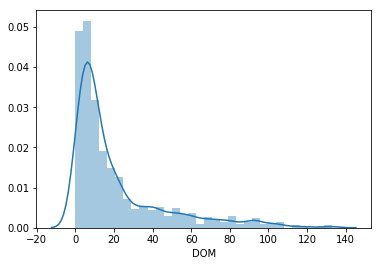

In [134]:
sns.distplot(df['DOM'])

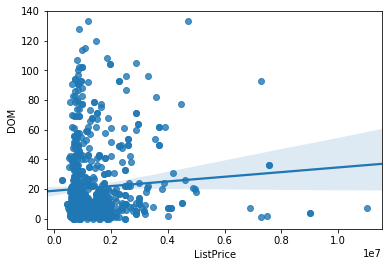

In [135]:
sns.regplot(df['ListPrice'], df['DOM'])

In [136]:
map_data = pd.read_json('data/houses.json', orient='records')

#map_data_dom = np.matrix(map_data.drop(['price'], 1).assign(DOM=df['DOM'])).tolist()

map_data_price = np.matrix(map_data.assign(price=lambda x: x['price'] / 100000)).tolist()

In [137]:
#[43.6532, -79.3832], 10

m = folium.Map(location=[43.6532, -79.3832])

HeatMap(map_data_price).add_to(m)

m

In [138]:
df['Heat'].value_counts()

Forced Air / Gas         675
Water / Gas               74
Radiant / Gas             27
Forced Air / Oil          19
Baseboard / Electric       7
Heat Pump / Gas            4
Other / Other              4
Fan Coil / Gas             3
Forced Air / Electric      3
Radiant / Oil              2
Heat Pump / Electric       2
Water / Oil                2
Baseboard / Other          2
Baseboard / Oil            2
Radiant / Electric         1
Water / Other              1
Forced Air / Wood          1
Other / Oil                1
Water / Electric           1
Name: Heat, dtype: int64

In [139]:
df.drop(['DOM', 'Address', 'PostalCode', 'SoldPrice'], axis=1)

District        HouseType  ListPrice      Tax  Rms  Bedrooms  Washrms  \
0        W10     1 1/2 Storey     568000   227773    5         3        2   
1        W06         Bungalow     629000   210899    8         4        2   
2        E03         Bungalow     639995   237061    6         2        1   
3        W10         Bungalow     698000   275410    8         4        2   
4        E04     1 1/2 Storey     788000   298408    7         3        3   
5        E10         Bungalow     795000   272258    8         5        2   
6        E07      Backsplit 4     799900   326099    6         5        2   
7        E10         Bungalow     849000   351554    7         4        2   
8        E01     2 1/2 Storey    1129000   378300   10         4        3   
9        E01         2-Storey    1198000   407409   10         3        2   
10       C04         2-Storey    1235000   592340   10         5        2   
11       C07         Bungalow    1269000   413200   10         4        2   
12       W02         2-Storey    1279000   388387    9         4        3   
13       E02         2-Storey    1459000   370000   11         4        4   
14       C04     1 1/2 Storey    1480000   502220    5         2        1   
15       C13         Bungalow    1588000   429983    9         4        3   
16       C01     2 1/2 Storey    1650000   774658   10         5        3   
17       E04         Bungalow     699900   260000    8         3        2   
18       E08         Bungalow     699900   283847   11         3        2   
19       E09      Backsplit 3     719900   290795    7         3        2   
20       E04         2-Storey     779000   259200    7         3        2   
21       E04         Bungalow     799000   300058    7         4        2   
22       W05      Sidesplit 5     829000   355612    9         4        3   
23       W09         Bungalow     849900   386568   10         5        2   
24       E10         Bungalow    1379999   275577    5         2        1   
25       C15  Bungalow-Raised    1499000   570000    7         4        3   
26       C07         2-Storey    1599000   474176    9         5        2   
27       C15         Bungalow    1950000   667602    9         4        2   
28       C07         2-Storey    3200000  1021640   12         5        6   
29       C04         2-Storey    3549000        0   11         5        5   
..       ...              ...        ...      ...  ...       ...      ...   
803      C09     2 1/2 Storey    1895000   699541   12         5        4   
804      C10         2-Storey    1895000   717556   12         5        3   
805      C04         2-Storey    1949000   579962   10         4        3   
806      C02         3-Storey    1950000   897689    9         4        4   
807      W01         2-Storey    1998000   487469   11         4        4   
808      C11         2-Storey    2099000   799766   11         4        4   
809      C04         2-Storey    2149000   857826    9         5        4   
810      C11         2-Storey    2190000   842000   15         5        3   
811      E10         2-Storey    2198800        0    9         5        4   
812      C10         2-Storey    2199000   917374    6         3        4   
813      C03     2 1/2 Storey    2299000   960381   12         4        5   
814      C14      Sidesplit 4    2388800   701678    9         5        3   
815      C04         2-Storey    2390000  1130259   11         5        5   
816      E02         3-Storey    2390000  1034024   15         6        4   
817      W07         2-Storey    2549000   542055   12         5        5   
818      C04         2-Storey    2550000   978907    8         4        4   
819      C04         2-Storey    2550000   891613    9         4        4   
820      C03         2-Storey    2665000   957404    9         4        3   
821      C13      Backsplit 5    2680000   922006   12         7        4   
822      W08         2-Storey    2689900   589062   11         5        5   


In [140]:
X = pd.get_dummies(df.drop(['DOM', 'Address', 'PostalCode', 'SoldPrice'], axis=1))
y = df['DOM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))

Mean squared error: 814.55
Variance score: -0.52


In [141]:
X2 = X
y2 = df['SoldPrice']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train2)

# Make predictions using the testing set
pred2 = regr.predict(X_test2)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test2, pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test2, pred2))


Mean squared error: 2825393628712.51
Variance score: -1.98
